# Modeling Time Series With Exponential Smoothing Methods

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.set_cmap('cubehelix')
sns.set_palette('cubehelix')

COLORS = [plt.cm.cubehelix(x) for x in [0.1, 0.3, 0.5, 0.7]]

<Figure size 800x450 with 0 Axes>

In [38]:
import pandas as pd
import numpy as np
from datetime import date
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, SimpleExpSmoothing, Holt)
import warnings
import yfinance as yf

1- Download thw aadjust price

In [7]:
df = yf.download('GOOG', start='2015-01-01', end='2023-12-31', progress=False)
print(f'Download {df.shape[0]} rows of data')

Download 2264 rows of data


2- Aggregate to monthly frequency

In [9]:
goog = df.resample('M').last().rename(columns={'Adj Close':'adj_close'}).adj_close

3- Create the training /test split

In [11]:
train_indices = goog.index.year < 2023
goog_train = goog[train_indices]
goog_test = goog[~train_indices]

test_length = len(goog_test)

4- Plot the prices

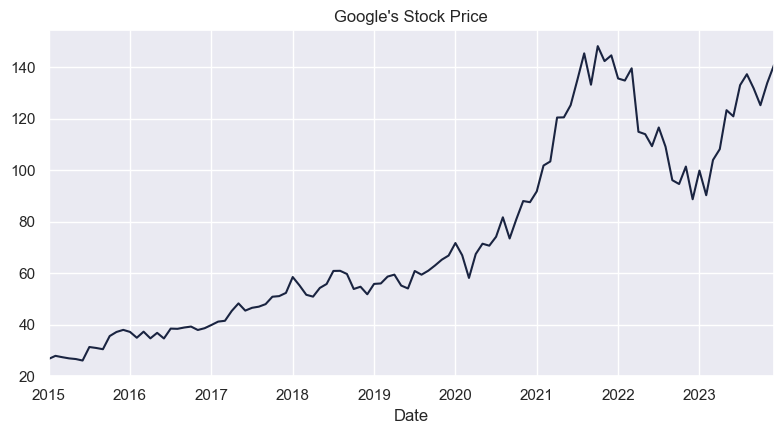

In [19]:
goog.plot(title="Google's Stock Price")

# Show
sns.set_theme()
plt.tight_layout()
plt.show()

5- Fit 3 Simple Exponential Smoothing models and create forecasts

In [39]:
ses_1 = SimpleExpSmoothing(goog_train).fit(smoothing_level=0.2)
ses_forecast_1 = ses_1.forecast(test_length)

ses_2 = SimpleExpSmoothing(goog_train).fit(smoothing_level=0.5)
ses_forecast_2 = ses_2.forecast(test_length)

ses_3 = SimpleExpSmoothing(goog_train).fit()
alpha = ses_3.model.params['smoothing_level']
ses_forecast_3 = ses_3.forecast(test_length)

6- Plot the original prices together with the models results

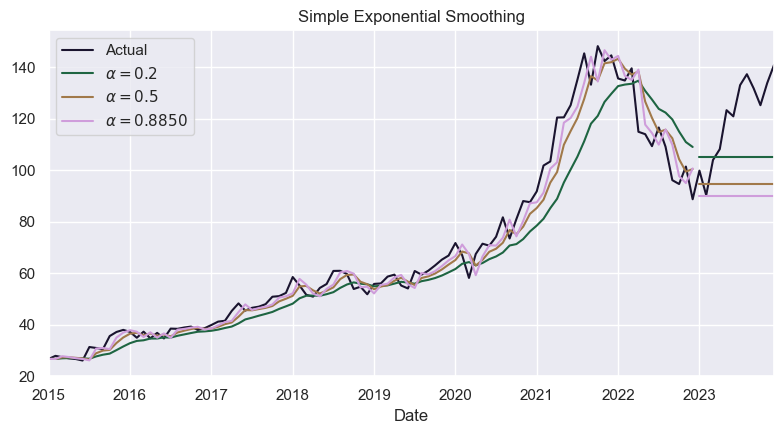

In [40]:
goog.plot(color=COLORS[0], title='Simple Exponential Smoothing', label='Actual', legend=True)

ses_forecast_1.plot(color=COLORS[1], legend=True, label=r'$\alpha=0.2$')
ses_1.fittedvalues.plot(color= COLORS[1])

ses_forecast_2.plot(color=COLORS[2], legend=True, label=r'$\alpha=0.5$')
ses_2.fittedvalues.plot(color=COLORS[2])

ses_forecast_3.plot(color=COLORS[3], legend=True, label=r'$\alpha={0:.4f}$'.format(alpha))
ses_3.fittedvalues.plot(color=COLORS[3])

# show
plt.tight_layout()
plt.show()

7- Fit 3 variants of the Holt's Smoothing models and create forecasts

In [42]:
# Holt's model with linear trend
hs_1 = Holt(goog_train).fit()
hs_forecast_1 = hs_1.forecast(test_length)

# Holt's model with exponential trend
hs_2 = Holt(goog_train, exponential=True).fit()
# Equivalent to ExponentialSmoothing(goog_train, trend='mul).fit()
hs_forecast_2 = hs_2.forecast(test_length)

# Holt's model with exponential trend and damping
hs_3 = Holt(goog_train, exponential=False, damped=True).fit(damping_slope=0.99)
hs_forecast_3 = hs_3.forecast(test_length)

8- Plot the original prices together with the models result

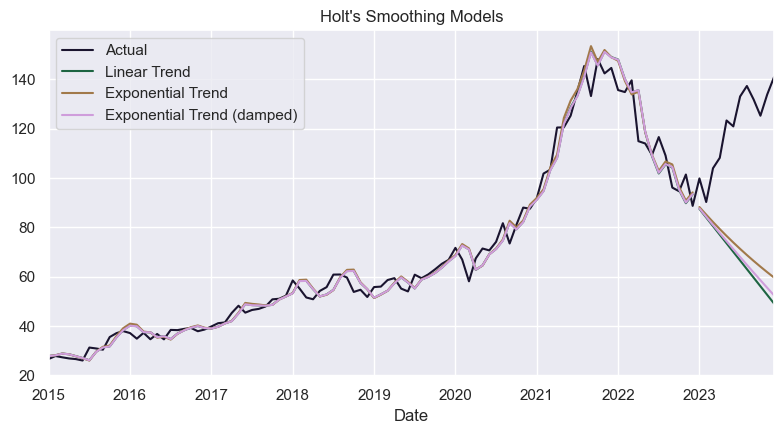

In [44]:
goog.plot(color=COLORS[0], title="Holt's Smoothing Models", label='Actual', legend=True)

hs_forecast_1.plot(color=COLORS[1], legend=True, label='Linear Trend')
hs_1.fittedvalues.plot(color=COLORS[1])

hs_forecast_2.plot(color=COLORS[2], legend=True, label='Exponential Trend')
hs_2.fittedvalues.plot(color=COLORS[2])

hs_forecast_3.plot(color=COLORS[3], legend=True, label='Exponential Trend (damped)')
hs_3.fittedvalues.plot(color=COLORS[3])

# Show
plt.tight_layout()
plt.show()